# Data Cleaning

In [1]:
#fill all missing values.

In [2]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# The data - read the titanic_train.csv
train = pd.read_csv("Data/titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

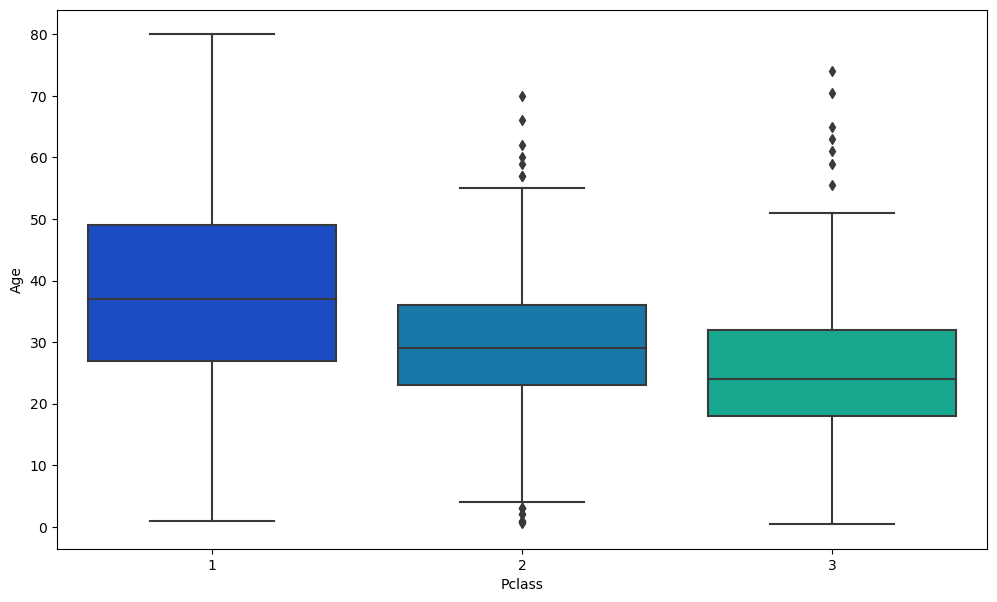

In [6]:
# check the aberage by passenger class
plt.figure(figsize = (12,7))
sns.boxplot(x='Pclass', y="Age", data = train, palette='winter')

In [7]:
# we will use these average age calues to impute based on Pclass for Age

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [10]:
#Now apply that function
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

<Axes: >

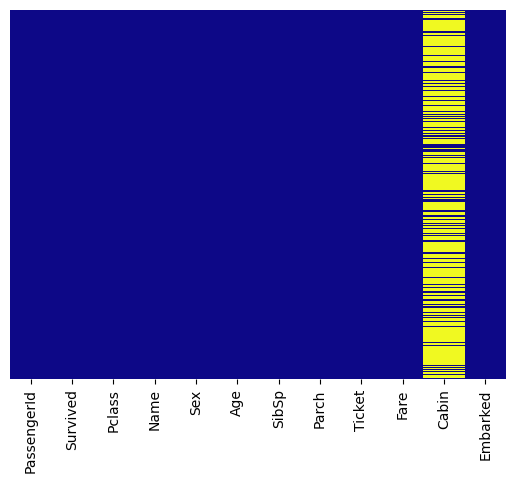

In [13]:
# now Let's check the heat map
sns.heatmap(train.isnull(), yticklabels = False, cbar=False, cmap='plasma')

In [15]:
# we drop the cabin and the row in Embarked that is NaN
train.drop('Cabin', axis = 1, inplace = True)

<Axes: >

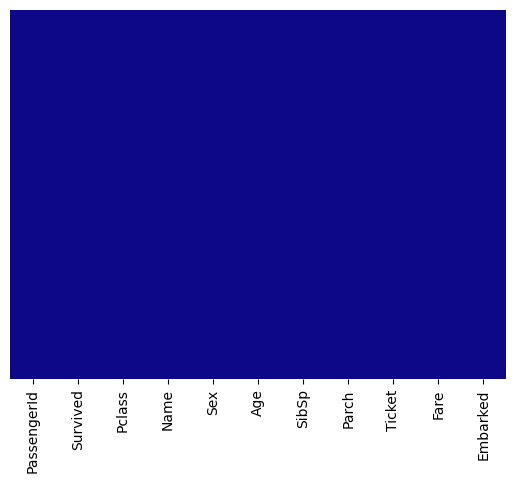

In [16]:
# now Let's check the heat map
sns.heatmap(train.isnull(), yticklabels = False, cbar=False, cmap='plasma')